# Data Science 1 - Home Assignment 1

**Author: Márton Nagy**

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
color = ["#DB5461", "#080357", "#3B8EA5", "#3B8EA5", "#3B8EA5"]
from sklearn.decomposition import PCA
%precision 4

'%.4f'

In [2]:
# Read the CSV file
url = 'https://www.statlearning.com/s/Ch10Ex11.csv'
genes = pd.read_csv(url, header=None)
# Transpose the dataframe and convert to pandas DataFrame
genes = genes.T
genes = pd.DataFrame(genes)
print('Dimensions of genes dataframe:', genes.shape)
# Define health_status
health_status = ['healthy'] * 20 + ['diseased'] * 20

Dimensions of genes dataframe: (40, 1000)


## Task 1

**Description:** Plot a histogram of the variances of each feature. Can we consider them as similarly-scaled? Would you recommend standardizing the features before applying PCA? Why or why not? (Hint: If the variances differ at most by an order of magnitude, I would consider them as similarly-scaled.)

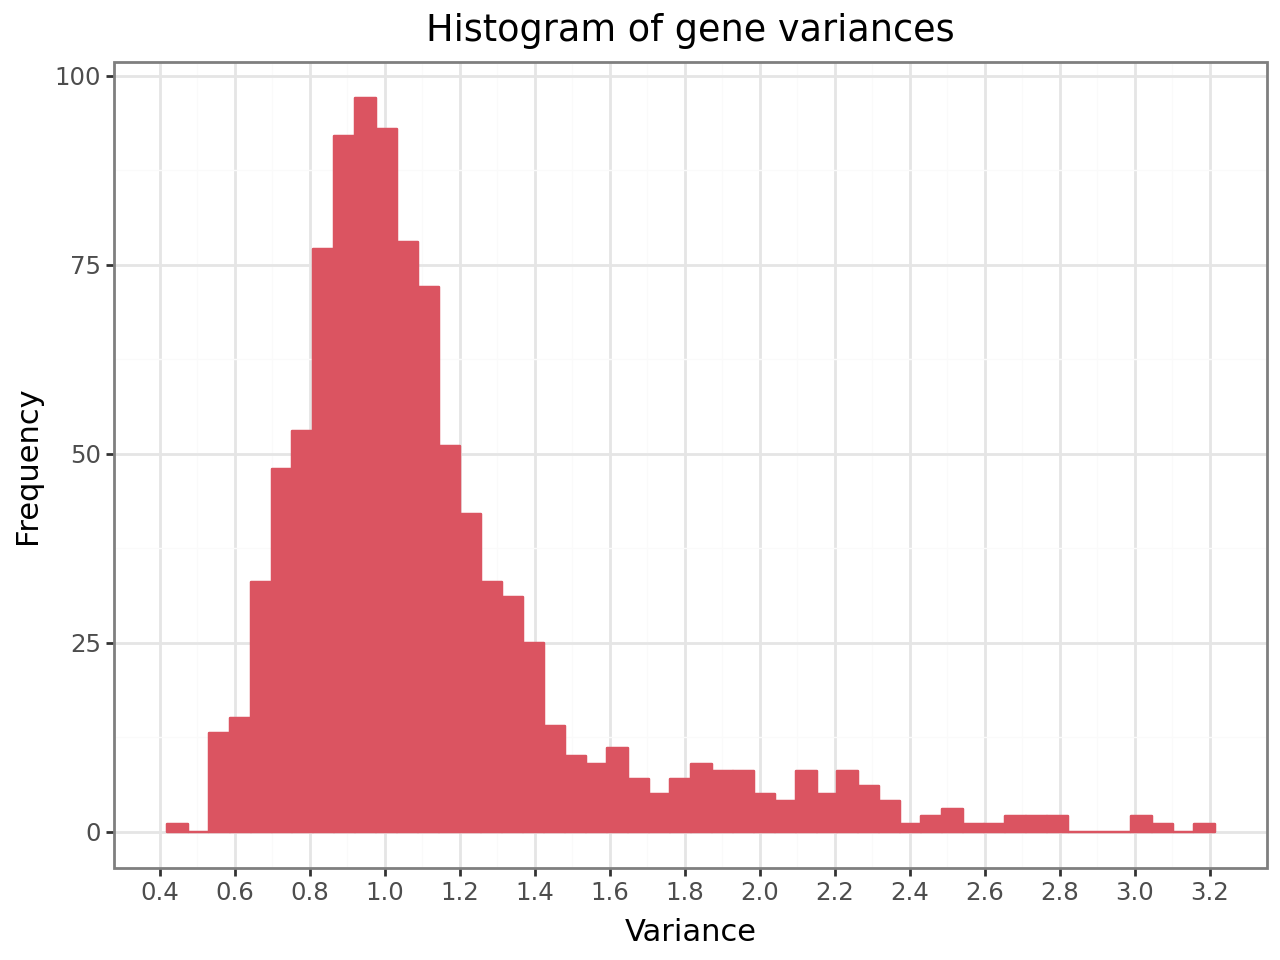

In [3]:
variances = []
for col in genes.columns:
    variances.append(genes[col].var())
(
    ggplot(pd.DataFrame({'variance': variances}), aes(x='variance'))
    + geom_histogram(bins=50, color = color[0], fill = color[0])
    + labs(title='Histogram of gene variances',
           x='Variance',
           y='Frequency')
    + scale_x_continuous(breaks=np.arange(0.4, 3.21, 0.2))
    + theme_bw()
)

**Answer:** The minimum of the variances is 0.42, while the maximum is 3.16. This means a difference of 7.5 times. This is lower than an order of magnitude (10 times difference). Thus, following the given hint, I would consider the features similarly scaled, and therefore, scaling is not needed before applying PCA.

# Task 2

**Description:** . Run PCA on the (full) dataset. How much components can explain at least 90% of the total variance? How much variance is explained by the first two principal components?

In [4]:
pca = PCA()
pca.fit(genes)
n_components_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
print(f'Number of principal components needed to explain at least 90% of total variance: {n_components_90}')
print(f'Variance explained by the first two principal components: {pca.explained_variance_ratio_[0:2].sum()*100:.2f}%')

Number of principal components needed to explain at least 90% of total variance: 33
Variance explained by the first two principal components: 15.94%


**Answer:** Based on the above calculations, we need the first 33 principal components to explain at least 90% of the total variance. The first two principal components together explain 15.94% of the total variance.

# Task 3

**Description:**  Plot the first two principal component scores (i.e., the projections onto the first two principal components). Color the data points by their health status. Are these components informative of patient health status? Which principal component appears more important for separating healthy from diseased patients?

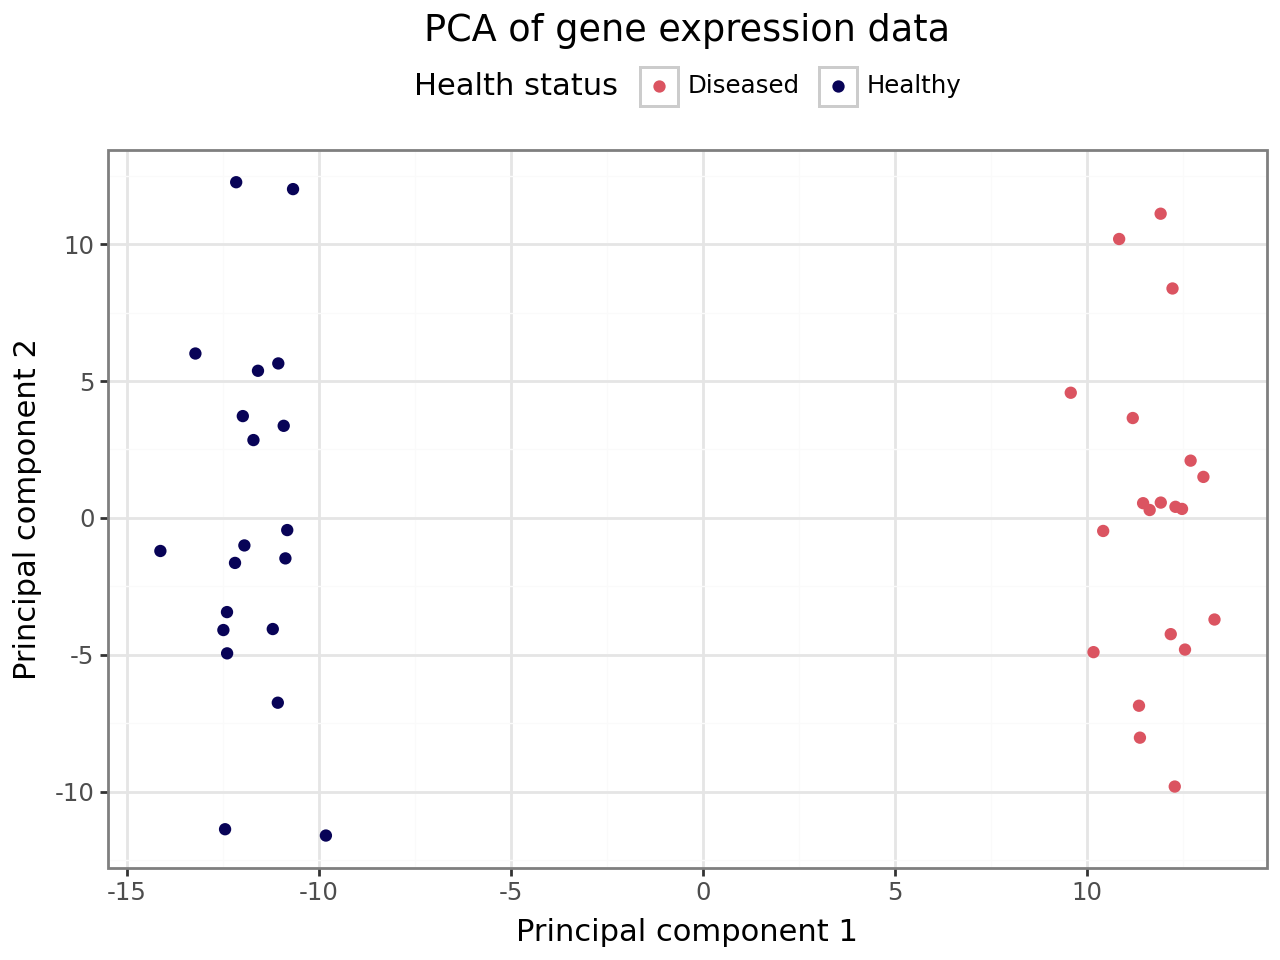

In [5]:
df_plot = pd.DataFrame({
    'pc1' : pca.transform(genes)[:, 0],
    'pc2' : pca.transform(genes)[:, 1],
    'health_status' : health_status
})
(
    ggplot(df_plot, aes(x='pc1', y='pc2', color='health_status'))
    + geom_point()
    + theme_bw()
    + labs(title='PCA of gene expression data',
           x='Principal component 1',
           y='Principal component 2')
    + scale_color_manual(name='Health status', labels=['Diseased', 'Healthy'], values = [color[0], color[1]])
    + theme(legend_position='top')
)

**Answer:** The first two principal components are very much informative of the health status of the observations, as the two categories are clearly separeted on the above plot. Moreover, it seems that the first principal component alone can capture the health status, as the points are clearly separeted along the horizontal axis. The second principal component captures something other than the health status, as the points are not seperated along the vertical axis.

# Task 4

**Description:** . Identify the genes that contribute most significantly to the principal component that best separates healthy and diseased patients. (Hint: Look at the loadings of the principal component.)

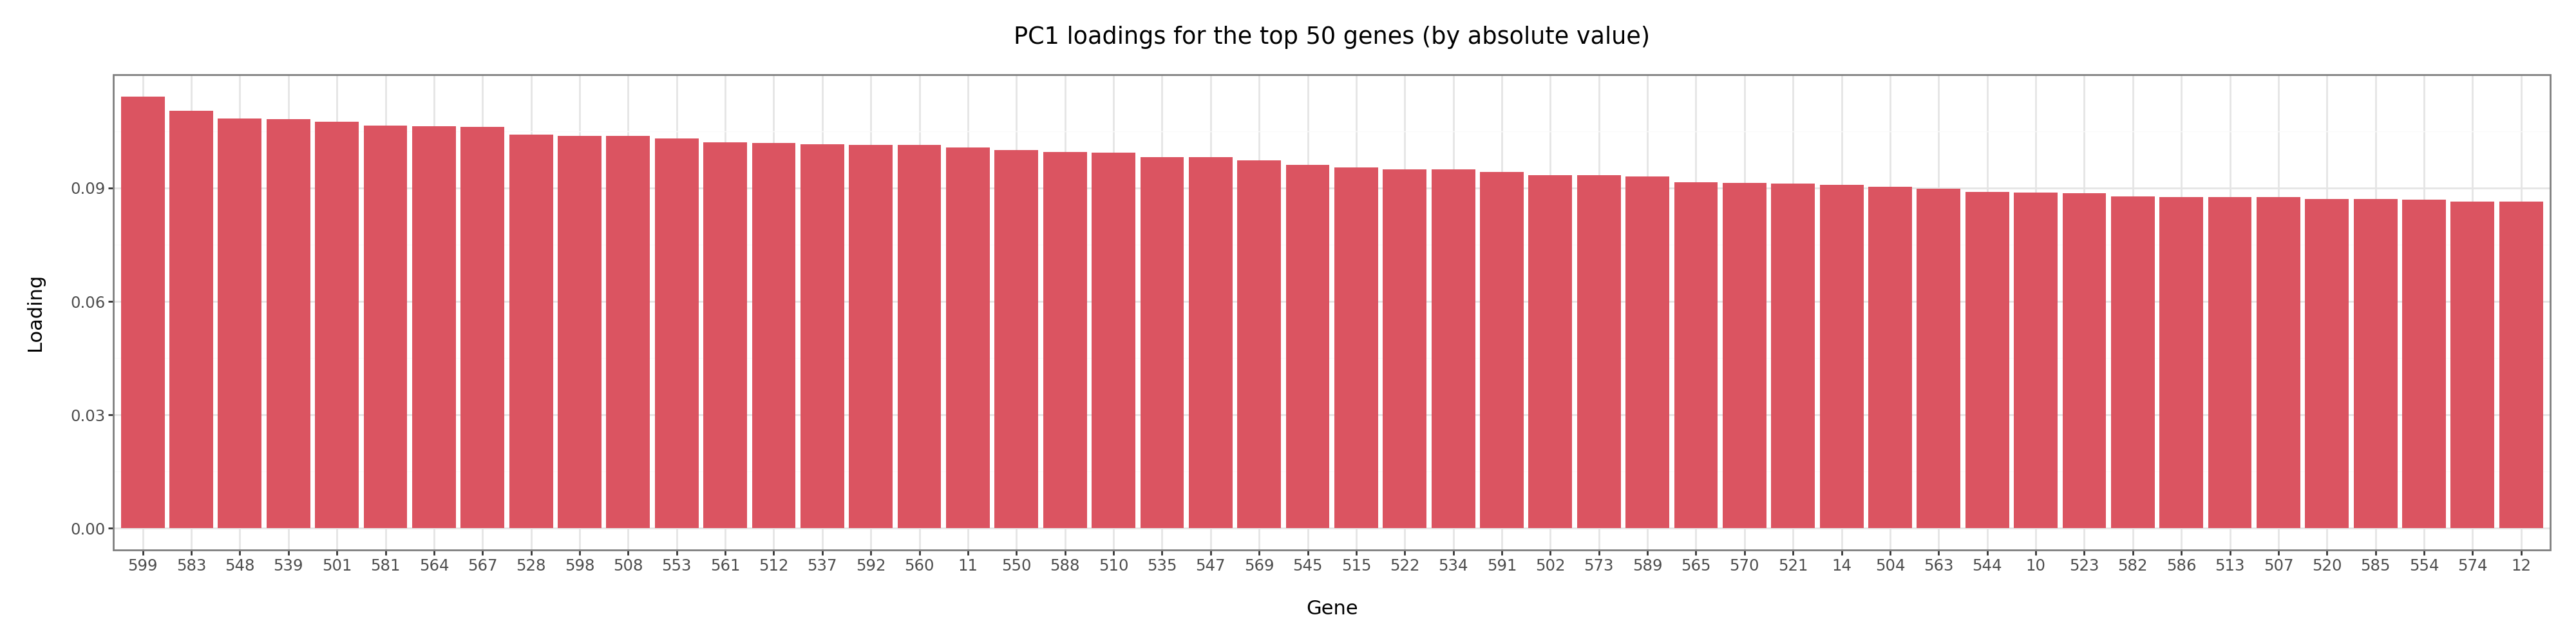

In [6]:
df_pc1_loadings = pd.DataFrame({
    'gene' : genes.columns.astype(str),
    'loading' : pca.components_[0],
    'abs_loading' : np.abs(pca.components_[0])
})

df_pc1_loadings = df_pc1_loadings.sort_values('abs_loading', ascending=False)

(
    ggplot(df_pc1_loadings.head(50), aes(x='reorder(gene, -abs_loading)', y='loading'))
    + geom_col(stat='identity', fill=color[0])
    + theme_bw()
    + labs(title='PC1 loadings for the top 50 genes (by absolute value)',
           x='Gene',
           y='Loading')
    +theme(figure_size=(20, 5))
)

**Answer:** As noted earlier, the principal component that best separetes observations by health status is the first one. Looking at the loadings of this principal component, we can see that the top three genes contributing to it are gene 599, 583 and 548. Moreover, we can see that in the top 50 genes contributing to this principal component, most of them are from the range between 500 and 600, with the exceptions being gene 11, 14, 10 and 12.